<a href="https://colab.research.google.com/github/emarttila/Koodausnaytteet/blob/main/Data_analysis_and_machine_learning_(Project_Toyota).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#This project was part of Machine Learning with Python course. Description of project is below:

'For the final project of the course, we are going to cover an interesting problem: "Toyota Corolla Price Prediction". We want to build a machine learning model that takes some specifications of a Toyota Corolla car as input and predicts its price as the output. So, prepare your Jupyter Notebook and follow these steps to complete the task:

1. Download the following .csv file and save it in your Notebook's directory. Then, load it into the workspace as data, and display its first 6 rows.

As we explained above, the target field is the 'Price' column.
2. Count and print the following statistics:

    Number of data samples
    Number of features
    Number of missing values for each feature
    Frequency of different number of doors (2, 3, 4, and 5)
    Frequency of different fuel types (Petrol, Diesel, CNG)

3. Compute and print the following values:

    The mean of price in each fuel type class? which class is more expensive?
    The mean of price in class ABS=0 and in class ABS=1.
    The mean of price in class Met_Color=0 and in class Met_Color=1.
    The mean of price in two-door, three-door,.... cars. 

Hint: use .groupby() .
4. Display the following plots:

    Scatter plot between 'KM' and 'Price'.
    Scatter plot between 'cc' and 'Price'.
    Distribution plot of continuous variables.
    Boxplot of continuous variables.

Hint: continuous_variables = ["Age", "KM", "HP", "cc","Doors","Guarantee_Period"].
5. Using the Boxplot you created in the previous question, you detected features with outliers. Remove the outlier values from the dataframe.
6. Since The 'Fuel_Type' variable is categorical, you need to convert it to numeric values. (Hint: Create three dummy variables and then drop the 'Fuel_Type' column.
7. Once again display the first 10 rows of data after you applied this conversion to make sure they have been applied correctly.
8. Store the "Price" column of data in the variable y, and other columns in variable X.
9. Use the train_test_split function to split X and y into a training set (X_train, y_train) with 75% of data, and a test set (X_test, y_test) with the remaining 25%.
10. Print the shape of X_train, X_test, y_train, y_test.
11. Train the Linear regression algorithm on X_train and y_train. Note that you should put normalize= True.
12. Use the attribute .score to check the accuracy of the model on train and test data.
13. Put y_hat_test = model.predict(X_test) and then plot the scatter plot between y_hat_test and y_test.
14. Print the r2_score and mean_squared_error of the model.
15. Fit RandomForestRegressor algorithm on the trained data and then repeat steps 12-14 for this algorithm too. (Note that since this algorithm does not have a normalized or max_min scaler parameter, you should scale data before feeding it to the algorithm).
16. Apply another suitable algorithm on the train and test data and evaluate it.'

#Loading dataset. 

In [27]:
dataset = pd.read_csv('Toyota_Corolla.csv')

#First 6 rows.

In [28]:
dataset.head(6)

,Price,Age,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Guarantee_Period,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model
0,13500,23,46986,Diesel,90,1,0,2000,3,0,3,1,0,0,1,0,1,1,1,0,0
1,13750,23,72937,Diesel,90,1,0,2000,3,0,3,1,1,0,1,1,1,0,1,0,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1,3,1,0,0,1,0,0,0,1,0,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1,3,1,0,0,1,0,0,0,1,0,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1,3,1,1,0,1,0,1,1,1,1,0
5,12950,32,61000,Diesel,90,0,0,2000,3,0,3,1,1,0,1,0,1,1,1,1,0


#Statistics.

In [29]:
print('Number of data samples:', str(len(dataset)), '\n')
print('Number of features:', str(len(dataset.columns)),'\n')
print('Missing values:','\n',dataset.isnull().sum(),'\n')
print('Frequency of different number of doors:','\n', dataset['Doors'].value_counts(),'\n')
print('Frequency of different fuel types:','\n', dataset['Fuel_Type'].value_counts())

Number of data samples: 1436 

Number of features: 21 

Missing values: 
 Price               0
Age                 0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Mfr_Guarantee       0
Guarantee_Period    0
ABS                 0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Mistlamps           0
Sport_Model         0
dtype: int64 

Frequency of different number of doors: 
 5    674
3    622
4    138
2      2
Name: Doors, dtype: int64 

Frequency of different fuel types: 
 Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64


#Comparing fuel types, ABS (or not), metal color (or not) and number of doors by mean price of a car.

Most expensive fuel type is Diesel. Cars with ABS brakes are more expensive than those without. Metal color cars are also slighty more expensive than other colors combined. Price of cars with odd number of doors are for some reason more expensive than price of a car with even number of doors.

In [30]:
print(round(dataset.groupby('Fuel_Type')['Price'].mean()),'\n')
print(round(dataset.groupby('ABS')['Price'].mean()),'\n')
print(round(dataset.groupby('Met_Color')['Price'].mean()),'\n')
print(round(dataset.groupby('Doors')['Price'].mean()))

Fuel_Type
CNG        9421.0
Diesel    11295.0
Petrol    10679.0
Name: Price, dtype: float64 

ABS
0     8414.0
1    11263.0
Name: Price, dtype: float64 

Met_Color
0    10162.0
1    11005.0
Name: Price, dtype: float64 

Doors
2     8100.0
3    10107.0
4     9807.0
5    11503.0
Name: Price, dtype: float64


#Looking at distributions of continious variables and detecting outliers.

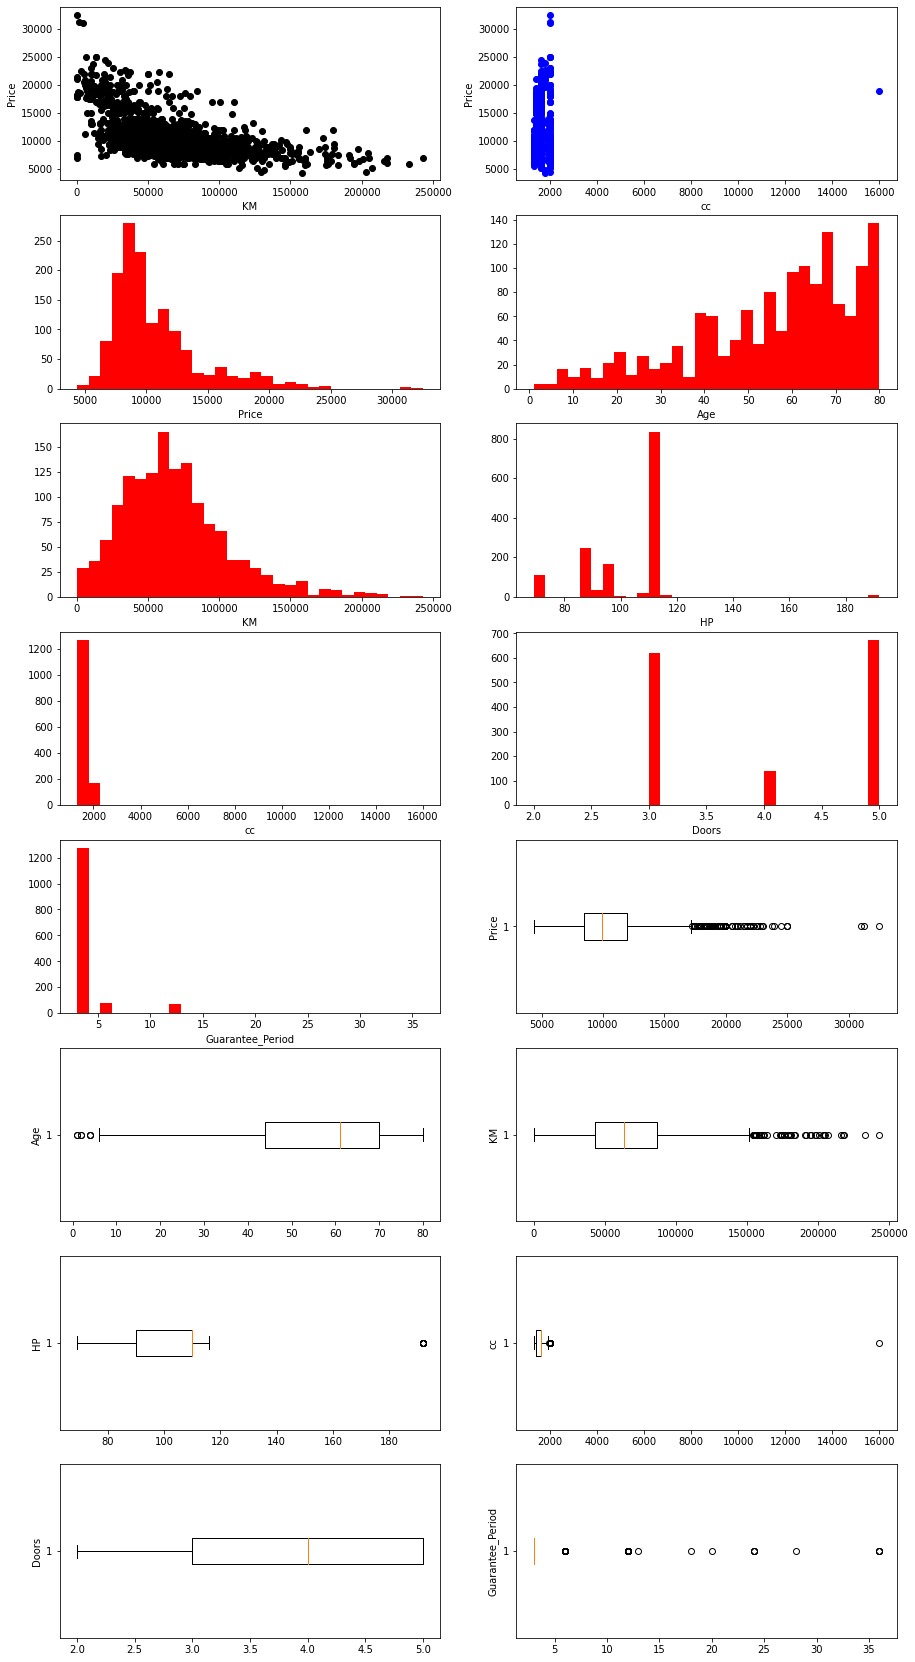

In [31]:
fig, ax = plt.subplots(8,2, figsize=(15,30), sharex = False, sharey = False)

ax[0][0].scatter(dataset.KM, dataset.Price, color='black')
ax[0][0].set_xlabel('KM')
ax[0][0].set_ylabel('Price')
ax[0][1].scatter(dataset.cc, dataset.Price, color='blue')
ax[0][1].set_xlabel('cc')
ax[0][1].set_ylabel('Price')
ax[1][0].hist(dataset.Price, color='red', bins = 30)
ax[1][0].set_xlabel('Price')
ax[1][1].hist(dataset.Age, color='red', bins = 30)
ax[1][1].set_xlabel('Age')
ax[2][0].hist(dataset.KM, color='red', bins = 30)
ax[2][0].set_xlabel('KM')
ax[2][1].hist(dataset.HP, color='red', bins = 30)
ax[2][1].set_xlabel('HP')
ax[3][0].hist(dataset.cc, color='red', bins = 30)
ax[3][0].set_xlabel('cc')
ax[3][1].hist(dataset.Doors, color='red', bins = 30)
ax[3][1].set_xlabel('Doors')
ax[4][0].hist(dataset.Guarantee_Period, color='red', bins = 30)
ax[4][0].set_xlabel('Guarantee_Period')
ax[4][1].boxplot(dataset.Price, vert=False)
ax[4][1].set_ylabel('Price')
ax[5][0].boxplot(dataset.Age, vert=False)
ax[5][0].set_ylabel('Age')
ax[5][1].boxplot(dataset.KM, vert=False)
ax[5][1].set_ylabel('KM')
ax[6][0].boxplot(dataset.HP, vert=False)
ax[6][0].set_ylabel('HP')
ax[6][1].boxplot(dataset.cc, vert=False)
ax[6][1].set_ylabel('cc')
ax[7][0].boxplot(dataset.Doors, vert=False)
ax[7][0].set_ylabel('Doors')
ax[7][1].boxplot(dataset.Guarantee_Period, vert=False)
ax[7][1].set_ylabel('Guarantee_Period')

plt.show()

#Removing outliers in terms of IQR.

In [32]:
feature_names = ['Price','Age','KM','HP','cc','Guarantee_Period','Doors']
Q1=[]
Q3=[]
IQR=[]

for i, j in enumerate(feature_names):
    Q1.append(dataset[j].quantile(.25))
    Q3.append(dataset[j].quantile(.75))
    IQR.append(Q3[i]-Q1[i])

for i, j in enumerate(feature_names):
    true_index = (dataset[j] >= (Q1[i] - 2 * IQR[i])) & (dataset[j] <=(Q3[i] + 2 * IQR[i]))
    dataset = dataset.loc[true_index] 

#Converting data types.

There is lot of variables in data which data type is integer but are actually categories. Next changing categorical variables data type to 'category' (for example 'CD_Player' has two options, and you can't put them in order or calculate with them).

In [33]:
dataset["Met_Color"] = dataset["Met_Color"].astype('category')
dataset["Automatic"] = dataset["Automatic"].astype('category')
dataset["Mfr_Guarantee"] = dataset["Mfr_Guarantee"].astype('category')
dataset["ABS"] = dataset["ABS"].astype('category')
dataset["Airco"] = dataset["Airco"].astype('category')
dataset["Automatic_airco"] = dataset["Automatic_airco"].astype('category')
dataset["Boardcomputer"] = dataset["Boardcomputer"].astype('category')
dataset["CD_Player"] = dataset["CD_Player"].astype('category')
dataset["Central_Lock"] = dataset["Central_Lock"].astype('category')
dataset["Powered_Windows"] = dataset["Powered_Windows"].astype('category')
dataset["Power_Steering"] = dataset["Power_Steering"].astype('category')
dataset["Mistlamps"] = dataset["Mistlamps"].astype('category')
dataset["Sport_Model"] = dataset["Sport_Model"].astype('category')
dataset["Fuel_Type"] = dataset["Fuel_Type"].astype('category')
dataset["cc"] = dataset["cc"].astype('category')

Encoding 'Fuel_Type' by creating dummy variables.

In [34]:
df_new = pd.get_dummies(dataset['Fuel_Type'])
dataset = pd.concat([dataset, df_new],axis=1)
dataset = dataset.drop(['Fuel_Type'], axis = 1) 

In [35]:
dataset.head(10)

,Price,Age,KM,HP,Met_Color,Automatic,cc,Doors,Mfr_Guarantee,Guarantee_Period,ABS,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,CNG,Diesel,Petrol
0,13500,23,46986,90,1,0,2000,3,0,3,1,0,0,1,0,1,1,1,0,0,0,1,0
1,13750,23,72937,90,1,0,2000,3,0,3,1,1,0,1,1,1,0,1,0,0,0,1,0
2,13950,24,41711,90,1,0,2000,3,1,3,1,0,0,1,0,0,0,1,0,0,0,1,0
3,14950,26,48000,90,0,0,2000,3,1,3,1,0,0,1,0,0,0,1,0,0,0,1,0
4,13750,30,38500,90,0,0,2000,3,1,3,1,1,0,1,0,1,1,1,1,0,0,1,0
5,12950,32,61000,90,0,0,2000,3,0,3,1,1,0,1,0,1,1,1,1,0,0,1,0
6,16900,27,94612,90,1,0,2000,3,0,3,1,1,0,1,0,1,1,1,0,1,0,1,0
7,18600,30,75889,90,1,0,2000,3,1,3,1,1,0,1,1,1,1,1,0,0,0,1,0
9,12950,23,71138,69,0,0,1900,3,0,3,1,1,0,1,0,0,0,1,0,0,0,1,0
18,16750,24,25563,110,0,0,1600,3,0,3,1,1,1,1,1,1,1,1,1,0,0,0,1


#Creating ML models from data.

Splitting data to X and y.

In [36]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0:1].values

Splitting data to training and test set.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25)

Shape of sets.

In [38]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (892, 22)
X_test shape: (298, 22)
y_train shape: (892, 1)
y_test shape: (298, 1)


Training Linear regression model.

In [39]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Accuracy of Linear regression model.

In [40]:
print('Accuracy on training data:',regressor.score(X_train, y_train))
print('Accuracy on test data:',regressor.score(X_test, y_test))

Accuracy on training data: 0.8502391518185214
Accuracy on test data: 0.8150678276392633


Scatter plot of predicted and real values of test set (Linear regression).

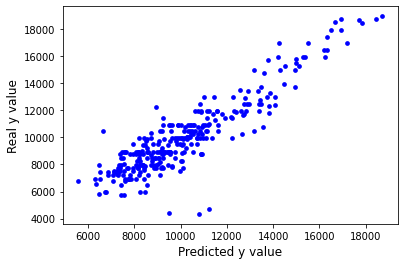

In [41]:
y_hat_test = regressor.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_hat_test, y_test, color='blue', marker='.', linewidth=1.75)
ax.set_xlabel("Predicted y value", fontsize=12);
ax.set_ylabel("Real y value", fontsize=12)

plt.show()

R2 and MSE of Linear regression model.

In [42]:
mse = mean_squared_error(y_test, y_hat_test)
r2 = r2_score(y_test, y_hat_test)
print("Test set MSE = {:.2f}".format(mse))
print("Test set R2 = {:.2f}".format(r2))

Test set MSE = 1434512.41
Test set R2 = 0.82


Same steps with Random forest regression.

In [43]:
forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [44]:
print('Accuracy on training data:',forest.score(X_train, y_train))
print('Accuracy on test data:',forest.score(X_test, y_test))

Accuracy on training data: 0.9733512080204113
Accuracy on test data: 0.7906161979780392


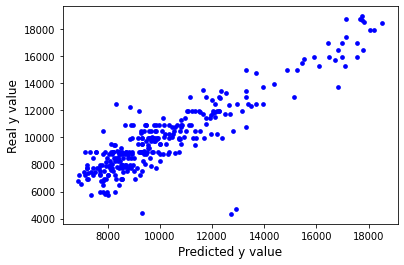

In [45]:
y_forest_test = forest.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_forest_test, y_test, color='blue', marker='.', linewidth=1.75)
ax.set_xlabel("Predicted y value", fontsize=12);
ax.set_ylabel("Real y value", fontsize=12)

plt.show()

In [46]:
mseforest = mean_squared_error(y_test, y_forest_test)
r2forest = r2_score(y_test, y_forest_test)
print("Test set MSE = {:.2f}".format(mseforest))
print("Test set R2 = {:.2f}".format(r2forest))

Test set MSE = 1624182.85
Test set R2 = 0.79


And same steps with XGBoost regression.

In [47]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[14:34:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [48]:
print('Accuracy on training data:',xgb.score(X_train, y_train))
print('Accuracy on test data:',xgb.score(X_test, y_test))

Accuracy on training data: 0.9210083698384007
Accuracy on test data: 0.832911628227816


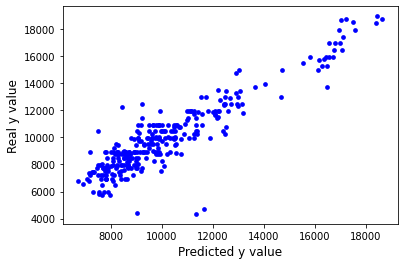

In [49]:
y_xgb_test = xgb.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_xgb_test, y_test, color='blue', marker='.', linewidth=1.75)
ax.set_xlabel("Predicted y value", fontsize=12);
ax.set_ylabel("Real y value", fontsize=12)

plt.show()

In [50]:
msexgb = mean_squared_error(y_test, y_xgb_test)
r2xgb = r2_score(y_test, y_xgb_test)
print("Test set MSE = {:.2f}".format(msexgb))
print("Test set R2 = {:.2f}".format(r2xgb))

Test set MSE = 1296098.67
Test set R2 = 0.83


XGBoost model produced best results. There was more overfitting with Random forest regression model than with other models. Overfitting was present with XGBoost model also, but it didn't lower test set accuracy as much.